<center><h2>UK ROAD ACCIDENTS DATA ANALYTICS PROJECT</h2>
<hr>
<h4>ANALYST : JUNNALYN M. MERILLO</h4></center>

<h2>IMPORT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

<h2>UPLOAD AND CHECK DATASETS</h2>

In [2]:
UK_Accidents = pd.read_csv('Datasets\\uk_road_accident.csv')

In [3]:
UK_Accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>CHECKING AVAILABLE COLUMNS</h2>
<hr>

In [4]:
UK_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h2>CHANGING DATA TPYE</h2>
<hr>

In [5]:
UK_Accidents ['Index'] = UK_Accidents ['Index'].astype('category')
UK_Accidents ['Accident_Severity'] = UK_Accidents ['Accident_Severity'].astype('category')
UK_Accidents ['Accident Date'] = UK_Accidents ['Accident Date'].astype('category')
UK_Accidents ['Light_Conditions'] = UK_Accidents ['Light_Conditions'].astype('category')
UK_Accidents ['District Area'] = UK_Accidents ['District Area'].astype('category')
UK_Accidents ['Road_Surface_Conditions'] = UK_Accidents ['Road_Surface_Conditions'].astype('category')
UK_Accidents ['Road_Type'] = UK_Accidents ['Road_Type'].astype('category')
UK_Accidents ['Urban_or_Rural_Area'] = UK_Accidents ['Urban_or_Rural_Area'].astype('category')
UK_Accidents ['Weather_Conditions'] = UK_Accidents ['Weather_Conditions'].astype('category')
UK_Accidents ['Vehicle_Type'] = UK_Accidents ['Vehicle_Type'].astype('category')

In [6]:
UK_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660654 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660653 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  659953 non-null  category
 10  Road_Type                656159 non-null  category
 11  Urban_or_Rural_Area      660664 non-null  category
 12  Weather_Conditions       646551 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>CHECKING NULL VALUES</h2>
<hr>

In [7]:
UK_Accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>FILLING UP NULL VALUES</h2>
<hr>

In [8]:
UK_Accidents ['Latitude'].mean()

np.float64(52.553865761110956)

In [9]:
UK_Accidents['Latitude'] = UK_Accidents['Latitude'].fillna(UK_Accidents['Latitude'].mean())

In [10]:
UK_Accidents ['Longitude'].mean()

np.float64(-1.431210368502073)

In [11]:
UK_Accidents['Longitude'] = UK_Accidents['Longitude'].fillna(UK_Accidents['Longitude'].mean())

In [12]:
UK_Accidents['Road_Surface_Conditions'].mode()

0    Dry
Name: Road_Surface_Conditions, dtype: category
Categories (5, object): ['Dry', 'Flood over 3cm. deep', 'Frost or ice', 'Snow', 'Wet or damp']

In [13]:
UK_Accidents['Road_Surface_Conditions'] = UK_Accidents['Road_Surface_Conditions'].fillna(UK_Accidents['Road_Surface_Conditions'].mode()[0])

In [14]:
UK_Accidents['Road_Type'].mode()

0    Single carriageway
Name: Road_Type, dtype: category
Categories (5, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']

In [15]:
UK_Accidents['Road_Type'] = UK_Accidents['Road_Type'].fillna(UK_Accidents['Road_Type'].mode()[0])

In [16]:
UK_Accidents['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: category
Categories (3, object): ['Rural', 'Unallocated', 'Urban']

In [17]:
UK_Accidents['Urban_or_Rural_Area'] = UK_Accidents['Urban_or_Rural_Area'].fillna(UK_Accidents['Urban_or_Rural_Area'].mode()[0])

In [18]:
UK_Accidents['Weather_Conditions'].mode()

0    Fine no high winds
Name: Weather_Conditions, dtype: category
Categories (8, object): ['Fine + high winds', 'Fine no high winds', 'Fog or mist', 'Other', 'Raining + high winds', 'Raining no high winds', 'Snowing + high winds', 'Snowing no high winds']

In [19]:
UK_Accidents['Weather_Conditions'] = UK_Accidents['Weather_Conditions'].fillna(UK_Accidents['Weather_Conditions'].mode()[0])

In [20]:
UK_Accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CLEARING ANY INCONSISTENCIES WITH THE DATASET</h2>

In [21]:
UK_Accidents['Accident Date'] = UK_Accidents['Accident Date'].str.strip()
UK_Accidents['Accident Date'] = UK_Accidents['Accident Date'].astype('str')
UK_Accidents['Accident Date'] = UK_Accidents['Accident Date'].str.replace('/','-')

In [22]:
UK_Accidents['Accident Date'] = pd.to_datetime(UK_Accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [23]:
UK_Accidents.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h2>EXTRACTING DATE INFORMATION USING PANDAS DATE TIME</h2>

In [24]:
UK_Accidents['Year'] = UK_Accidents['Accident Date'].dt.year
UK_Accidents['Month'] = UK_Accidents['Accident Date'].dt.month
UK_Accidents['Day'] = UK_Accidents['Accident Date'].dt.day
UK_Accidents['Day_Of_Week'] = UK_Accidents['Accident Date'].dt.dayofweek

In [25]:
UK_Accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,Day_Of_Week
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<center><h1>EXPLANATORY DATA ANALYSIS</h1><center>
<hr>

<h3>Question 1. Is there a correlation between Latitude and Number of Casualties?</h3>

In [26]:
LaNC_Corr = UK_Accidents['Latitude'].corr(UK_Accidents['Number_of_Casualties'])
LaNC_Corr

np.float64(0.032200686625906395)

<h4>Insight 1</h4>
<p>Shown above is the correlation between Latitude, which is use to determine the exact location of the incident and the Number of Casualties in the accident. In this insight, it clearly shows that the correlation is weak with 0.03, between the Latitude or exact location of the incident and Number of Casualties.</p>
<hr>

<h3>Question 2. What type of vehicles are most commonly involved in accidents that result to fatal injuries?</h3>

In [27]:
UK_AccSev = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Fatal'].groupby(['Vehicle_Type', 'Urban_or_Rural_Area']).size()
UK_AccSev

Vehicle_Type                           Urban_or_Rural_Area
Agricultural vehicle                   Rural                    14
                                       Unallocated               0
                                       Urban                     7
Bus or coach (17 or more pass seats)   Rural                   213
                                       Unallocated               0
                                       Urban                   112
Car                                    Rural                  4285
                                       Unallocated               0
                                       Urban                  2292
Data missing or out of range           Rural                     0
                                       Unallocated               0
                                       Urban                     0
Goods 7.5 tonnes mgw and over          Rural                   139
                                       Unallocated               0
   

<h4>Insight 2</h4>
<p>This insight shows the types of vehicles involved in accidents across rural and urban areas. Cars (6,577), vans (467), and motorcycles over 500cc (339) are the most commonly used vehicles in incidents that resulted in fatal severity.</p>
<hr>

<h3>Question 3. What is the sum of fatal accident severity cases in Highland district?</h3>

In [28]:
((UK_Accidents['District Area'] == 'Highland') & (UK_Accidents['Accident_Severity'] == 'Fatal')).sum()

np.int64(88)

<h4>Insight 3</h4>
<p>Based from the result above, the sum of incident with fatal severity in the Highland district is 88.</p>
<hr>

<h3>Question 4. In the District of Northampton, what is the highest number of casualties?</h3>

In [29]:
DA_AccSev = UK_Accidents[UK_Accidents['District Area'] == 'Northampton'].groupby(['Accident_Severity','Light_Conditions'])['Number_of_Casualties'].max()
DA_AccSev

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown     1.0
                   Darkness - lights lit           3.0
                   Darkness - lights unlit         NaN
                   Darkness - no lighting          1.0
                   Daylight                        6.0
Serious            Darkness - lighting unknown     1.0
                   Darkness - lights lit           6.0
                   Darkness - lights unlit         1.0
                   Darkness - no lighting          4.0
                   Daylight                        5.0
Slight             Darkness - lighting unknown     3.0
                   Darkness - lights lit          10.0
                   Darkness - lights unlit         2.0
                   Darkness - no lighting          2.0
                   Daylight                        7.0
Name: Number_of_Casualties, dtype: float64

<h4>Insight 4</h4>
<p>Shown above are the number of casualties and accident severity, as well as the light condition during the incident. The hightest number of casualty in the District of Northamton is 10, slight severity and happen during night with light on.</p>
<hr>

<h3>Question 5. In the first 50 District of UK, which District area has the highest number of fatal accident cases?</h3>

In [30]:
UK = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Fatal'].groupby(['District Area']).size().head(50)
UK

District Area
Aberdeen City                    12
Aberdeenshire                    66
Adur                              8
Allerdale                        24
Alnwick                           6
Amber Valley                     19
Angus                            32
Argyll and Bute                  27
Arun                             15
Ashfield                         11
Ashford                          26
Aylesbury Vale                   28
Babergh                          20
Barking and Dagenham             20
Barnet                           46
Barnsley                         35
Barrow-in-Furness                 6
Basildon                         16
Basingstoke and Deane            34
Bassetlaw                        38
Bath and North East Somerset     26
Bedford                          22
Berwick-upon-Tweed                3
Bexley                           12
Birmingham                      105
Blaby                            23
Blackburn with Darwen             8
Blackpool     

<h4>Insight 5</h4>
<p>Shown above are the first 50 District of UK. As you can see, this 50 District Area are most likely to have lower than 50 fatal cases which is a good thing. Here, you can easily identify which district area has the highest fatal cases, and that district is Birmingham with the total of 105 fatal cases. </p>
<hr>

<h3>Question 6. In year 2020, what is highest number of total in terms of accident severity?</h3>

In [31]:
UK_Acc2020 = UK_Accidents[(UK_Accidents['Accident_Severity'] == 'Slight') & (UK_Accidents['Year'] == 2020)]
UK_Acc2020SE = UK_Accidents[(UK_Accidents['Accident_Severity'] == 'Serious') & (UK_Accidents['Year'] == 2020)] 
UK_Acc2020F = UK_Accidents[(UK_Accidents['Accident_Severity'] == 'Fatal') & (UK_Accidents['Year'] == 2020)] 

In [32]:
UK_Acc2020.index

Index([182121, 182123, 182124, 182126, 182127, 182128, 182129, 182130, 182131,
       182132,
       ...
       352695, 352696, 352698, 352699, 352700, 352701, 352702, 352703, 352704,
       352705],
      dtype='int64', length=145129)

In [33]:
UK_Acc2020SE.index

Index([182115, 182116, 182117, 182118, 182119, 182120, 182122, 182125, 182133,
       182138,
       ...
       352658, 352666, 352668, 352672, 352673, 352679, 352682, 352683, 352684,
       352697],
      dtype='int64', length=23121)

In [34]:
UK_Acc2020F.index

Index([182401, 182823, 182832, 182847, 183074, 183146, 185047, 185052, 185053,
       185057,
       ...
       352279, 352310, 352322, 352375, 352428, 352469, 352525, 352583, 352649,
       352669],
      dtype='int64', length=2341)

<h4>Insight 6</h4>
<p>In the year 2020 there are total of 170,591 accidents. According from the result from data set of year 2020, total of 145,129 slight accident severity, while total of 23,121 serious accident severity and total of 2,341 in fatal accident severity. In this insight, it shows that Slight accident severity has the highest number of result while fatal accident severity has the lowest.</p>
<hr>

<h3>Question 7. In one week, which day has the most and less accident?</h3>

In [35]:
UK_Accidents['Day_Of_Week'] = UK_Accidents['Accident Date'].dt.day_name()
UK_Accidents['Day_Of_Week'].value_counts()

Day_Of_Week
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

<h4>Insight 7</h4>
<p>Shown above are the result of accident per day. Seems like Saturday tend to have the highest number of accident, possible reason is that people are on the road heading home from work, school, or going on a weekend trips. And Monday, tend to have the lowest number of accidents.</p>
<hr>

<h3>Question 8. Which month has the highest number of fatal severity?</h3>

In [36]:
UK_Month = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Fatal'] ['Accident Date'].dt.month_name().value_counts()
UK_Month

Accident Date
August       801
October      798
May          760
July         753
November     747
January      740
September    723
April        697
March        681
June         673
December     671
February     617
Name: count, dtype: int64

<h4>Insight 8</h4>
<p>The month of August has the highest number of fatal severity with the total of 801. And on the other hand, the month of February has the lowest cases of fatal severity with the total of 617.</p>
<hr>

<h3>Question 9. What wheather condition show the lowest number of casualty?</h3>

In [37]:
UK_Accidents.groupby('Weather_Conditions')['Number_of_Casualties'].size()

Weather_Conditions
Fine + high winds          8554
Fine no high winds       535013
Fog or mist                3528
Other                     17150
Raining + high winds       9615
Raining no high winds     79696
Snowing + high winds        885
Snowing no high winds      6238
Name: Number_of_Casualties, dtype: int64

<h4>Insight 9</h4>
<p>Normal wheather is more likely to have the highest number of casualties rather than foggy or raining wheather condition. Whereas, Snowing with high winds has the lowest number of casualties.</p>
<hr>

<h3>Question 10. What road condition most likely has the lowest case of serious injuries?</h3>

In [38]:
UK_RoadSurf = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Serious'] ['Road_Surface_Conditions']
UK_RoadSurf.value_counts()

Road_Surface_Conditions
Dry                     61708
Wet or damp             23785
Frost or ice             2007
Snow                      565
Flood over 3cm. deep      152
Name: count, dtype: int64

<h4>Insight 10</h4>
<p>The road condition that has the lowest case resulting to serious injury is flood over 3cm deep. And Dry road condition has the highest number of cases causing serious injury, while wet or damp condition is second to have the highest number of cases.</p>
<hr>

<h3>Question 11. How many high road related accidents are recorded in year 2021?</h3>

In [39]:
UK_Acc2021 = UK_Accidents[(UK_Accidents['Road_Type'] == 'Dual carriageway') & (UK_Accidents['Year'] == 2021)] 
UK_Acc2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24052 entries, 352713 to 516255
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    24052 non-null  category      
 1   Accident_Severity        24052 non-null  category      
 2   Accident Date            24052 non-null  datetime64[ns]
 3   Latitude                 24052 non-null  float64       
 4   Light_Conditions         24052 non-null  category      
 5   District Area            24052 non-null  category      
 6   Longitude                24052 non-null  float64       
 7   Number_of_Casualties     24052 non-null  int64         
 8   Number_of_Vehicles       24052 non-null  int64         
 9   Road_Surface_Conditions  24052 non-null  category      
 10  Road_Type                24052 non-null  category      
 11  Urban_or_Rural_Area      24052 non-null  category      
 12  Weather_Conditions       24052 

<h4>Insight 11</h4>
<p>In 2021, there are total of 24,052 recorded that is related to high road accidents.</p>
<hr>

<h3>Question 12. Do Rural areas have high accident recorded than Urban areas?</h3>

<Axes: xlabel='Urban_or_Rural_Area'>

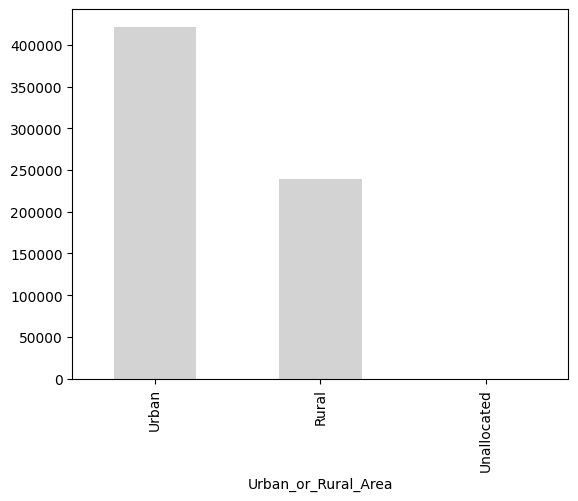

In [40]:
UK_Accidents['Urban_or_Rural_Area'].value_counts().plot(kind = 'bar', color = 'lightgrey')

<h4>Insight 12</h4>
<p>Seems like Urban areas tend to have the highest accident recorded than Rural areas. More likely because of high volume of vehicle and pedestrian traffic, complex road networks with more intersections and a higher density of opportunities for accidents to occur.</p>
<hr>

<h3>Question 13. Which District of UK has the lowest number of accidents recorded?</h3>

In [41]:
UK_Accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h4>Insight 13</h4>
<p>Based from the result above, the district of UK that has the lowest number of accident is the district of Clackmannanshire and second to the lowest accidents recorded is Orkney Islands. In contrast, the district of Birmingham has the highest number of accidents recorded in the data set.</p>
<hr>

<h3>Question 14. What road type has the highest number of casualties?</h3>

<Axes: xlabel='Road_Type'>

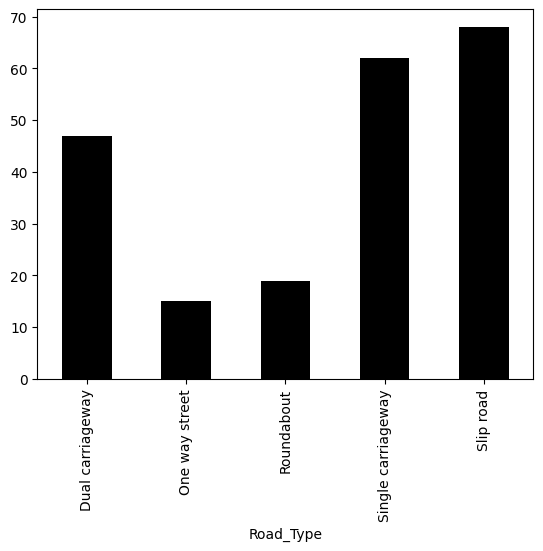

In [42]:
UK_RoCas = UK_Accidents.groupby('Road_Type')['Number_of_Casualties'].max().plot(kind = 'bar', color = 'black')
UK_RoCas

<h4>Insight 14</h4>
<p>Slip road have the highest number of casualties in the dataset with the total of 68. Possible reason for this high number of casualties is that, these areas invlove merging or existing traffic, often at high speeds that can cause accidents. </p>
<hr>

<h3>Question 15. What road condition are most likely to cause fatal accidents in Urban and Rural areas?</h3>

In [43]:
UK_Accidents.groupby(['Urban_or_Rural_Area', 'Road_Surface_Conditions', 'Accident_Severity']).size()

Urban_or_Rural_Area  Road_Surface_Conditions  Accident_Severity
Rural                Dry                      Fatal                  3637
                                              Serious               24240
                                              Slight               117268
                     Flood over 3cm. deep     Fatal                    20
                                              Serious                 122
                                              Slight                  643
                     Frost or ice             Fatal                   156
                                              Serious                1276
                                              Slight                 9521
                     Snow                     Fatal                    29
                                              Serious                 356
                                              Slight                 2717
                     Wet or damp              Fa

<h4>Insight 15</h4>
<p>In this insight, shown are the road conditions that causes fatal accident in urban and rural areas. In Rural and Urban areas, Dry road condition are most likely to cause more fatal accident than other conditions like frost and snow.</p>
<hr>

<h3>Question 16. How many accidents happen at night when the lights are off?</h3>

In [44]:
UK_LiOff = UK_Accidents[UK_Accidents['Light_Conditions'] == 'Darkness - lights unlit'].value_counts().sum()
UK_LiOff

np.int64(2543)

<h4>Insight 16</h4>
<p>A total of 2,543 accidents happen at night when street lights were off. This shows how critical proper street lighting is for nighttime driving safety. </p>
<hr>

<h3>Question 17. What year has the highest number of accident?</h3>

<Axes: ylabel='count'>

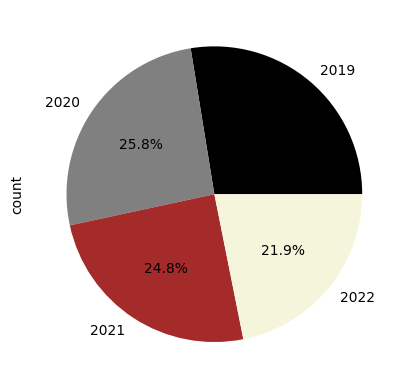

In [45]:
UK_Year = UK_Accidents['Year'].value_counts().sort_index().plot(kind = 'pie', colors = ['black', 'grey', 'brown', 'beige'], autopct = '%1.1f%%')
UK_Year

<h4>Insight 17</h4>
<p>In this insight, shown are the sum of accidents happen in each year. Fromn this result, 2019 recorded the highest number of accidents with the total of 182,115 (27.6%) marks as the peak year in the dataset.</p>
<hr>

<h3>Question 18. Which severity level has the highest percentage of casualties?</h3>

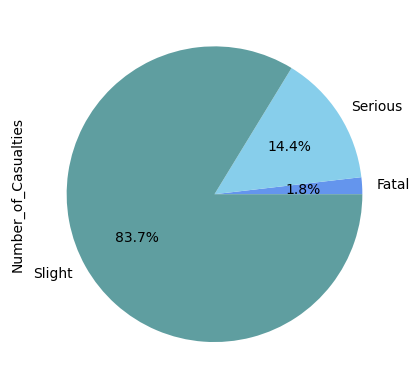

In [46]:
UK_Accsev = UK_Accidents.groupby('Accident_Severity') ['Number_of_Casualties'].sum().plot(kind = 'pie', colors = ['cornflowerblue', 'skyblue', 'cadetblue'], autopct = '%1.1f%%')

<h4>Insight 18</h4>
<p>83.7% of accidents lead to slight injuries, while fatal cases make up just 1.8% the lowest percentage of casualties.</p>
<hr>

<h3>Question 19. What is the sum of accidents recorded in year 2022?</h3>

In [47]:
UK_Acc2022 = UK_Accidents[UK_Accidents['Accident Date'].dt.year == 2022]
Cass2022 = UK_Acc2022 ['Number_of_Casualties'].sum()
Cass2022

np.int64(195737)

<h4>Insight 19</h4>
<p>In 2022, UK road accidents resulted in 195,737 casualties, a striking number that underscores the ongoing need for traffic safety measures and public awareness.
</p>
<hr>

<h3>Question 20. Do single carriageways has more accidents in rural or urban areas?</h3>

In [48]:
Acc_SiCa = UK_Accidents[UK_Accidents['Road_Type'] == 'Single carriageway'].groupby ('Urban_or_Rural_Area')['Number_of_Casualties'].sum()
Acc_SiCa

Urban_or_Rural_Area
Rural          249634
Unallocated        11
Urban          417765
Name: Number_of_Casualties, dtype: int64

<h4>Insight 20</h4>
<p> Single carriageway accidents are far more common in urban areas, with 417,765 casualties, compared to 249,634 in rural zones. This highlights the need for stronger safety measures in busy city roads where traffic density and pedestrian activity are higher.
</p>
<hr>

<h3>Question 21. What wheather light conditions has low number of casualties?</h3>

In [49]:
LoCas = UK_Accidents.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].sum()
LoCas

Weather_Conditions     Light_Conditions           
Fine + high winds      Darkness - lighting unknown        82
                       Darkness - lights lit            2543
                       Darkness - lights unlit            75
                       Darkness - no lighting           1213
                       Daylight                         7943
Fine no high winds     Darkness - lighting unknown      6971
                       Darkness - lights lit          128194
                       Darkness - lights unlit          2306
                       Darkness - no lighting          39324
                       Daylight                       544080
Fog or mist            Darkness - lighting unknown        89
                       Darkness - lights lit            1323
                       Darkness - lights unlit            48
                       Darkness - no lighting           1267
                       Daylight                         2399
Other                  Darkness - 

<h4>Insight 21</h4>
<p>The lowest number of casualties occurred during fine weather with high winds and darkness with unknown lighting, with total of 82. This rare combination suggests that extreme or unclear conditions may lead to fewer vehicles on the road, or more cautious driving.
</p>
<hr>

<h3>Question 22. What is the maximum latitude recorded in the dataset?</h3>

In [50]:
UK_Accidents['Latitude'].max()

np.float64(60.757544)

<h4>Insight 22</h4>
<p>UK accident data reaches up to latitude 60.78, showing coverage of far northern areas.
</p>
<hr>

<h3>Question 23. Is there a correlation between number of vehicles and number of casualties?</h3>

In [51]:
VeCa = UK_Accidents['Number_of_Vehicles'].corr(UK_Accidents['Number_of_Casualties'])
VeCa

np.float64(0.22888886126927557)

<h4>Insight 23</h4>
<p>There's a weak positive correlation (0.23) between the number of vehicles involved and the number of casualties, meaning more vehicles slightly increase the chance of more injuries, but the relationship isn’t strong.
</p>
<hr>

<h3>Question 24.Which day per week has the most fatal accidents recorded?</h3>

<Axes: ylabel='count'>

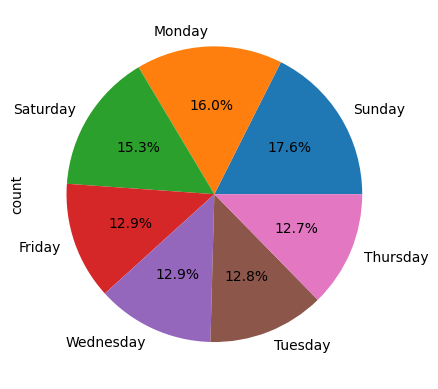

In [52]:
AccSev_Fatal = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Fatal']['Day_Of_Week'].value_counts()
AccSev_Fatal.plot(kind = 'pie', autopct = '%1.1f%%')

<h4>Insight 24</h4>
<p>Sunday has the highest percentage of fatal accidents at 17.6%, making it the most dangerous day of the week on UK roads. Monday and Saturday follow closely at 16.0% each.
</p>
<hr>

<h3>Question 25. What is the average number of vehicles involved in accidents based on road conditions?</h3>

In [53]:
Acc_VeRo = UK_Accidents[UK_Accidents['Accident_Severity'] == 'Fatal'].groupby ('Road_Surface_Conditions')['Number_of_Vehicles'].mean()
Acc_VeRo

Road_Surface_Conditions
Dry                     1.804491
Flood over 3cm. deep    1.782609
Frost or ice            1.756477
Snow                    1.600000
Wet or damp             1.753053
Name: Number_of_Vehicles, dtype: float64

<h4>Insight 25</h4>
<p>Fatal accidents involve an average of fewer than 2 vehicles, regardless of road surface conditions. The highest average is on dry roads (1.80 vehicles), while snowy and icy roads show slightly lower averages.</p>
<hr>

<h1>USING DISTRICT AREA TO MAKE COMPAROSON TO A GENERAL RESULT</h1>

In [54]:
UK_Accidents['District Area'].unique()

for d in (UK_Accidents['District Area'].unique()):
    print(d)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

In [55]:
DF_AV = UK_Accidents[UK_Accidents['District Area'] == 'Amber Valley']

<hr>
<h3>AMBER VALLEY DISTRICT</h3>
<img src = 'https://www.greatbritishlife.co.uk/resources/images/18656773.jpg?type=mds-article-962' \>

In [56]:
locations = list(zip(DF_AV['Latitude'], DF_AV['Longitude']))
AV_Map = folium.Map(location = [DF_AV['Latitude'].mean(), DF_AV['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(AV_Map)
AV_Map.save('Amber_heatmap.html')
AV_Map

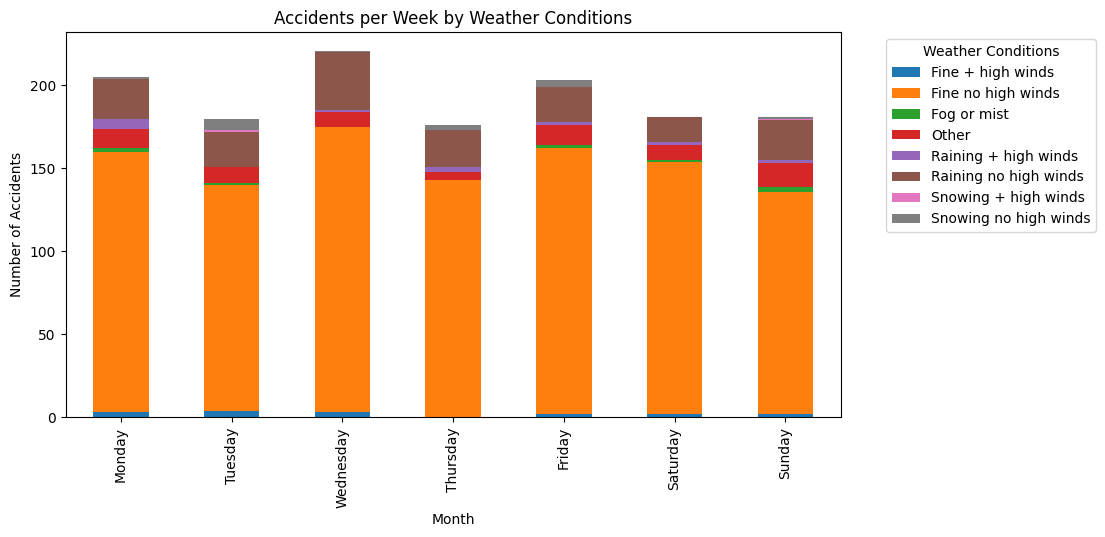

In [57]:
# Accident Distribution per Day of Week due to Weather Conditions
AV_Accidents_by_month_weather = DF_AV.groupby(['Day_Of_Week', 'Weather_Conditions']).size().unstack()
AV_Accidents_by_month_weather.plot(kind='bar', stacked = True)

plt.title('Accidents per Week by Weather Conditions')
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.gcf().set_size_inches(10,5)
plt.show()

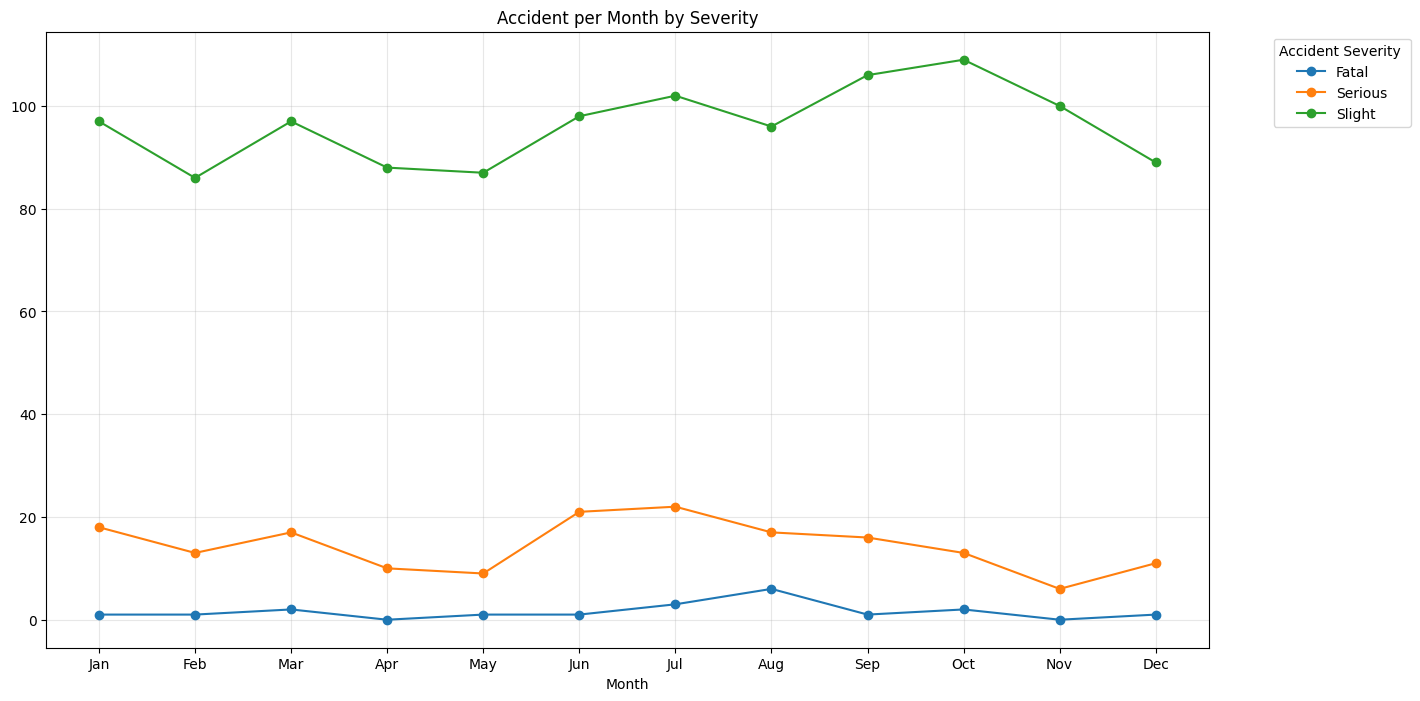

In [58]:
# Accident Severity Distribution per Month
Monthly_AV_data = DF_AV.groupby(['Accident_Severity', 'Month']).size().unstack(level=0)
Monthly_AV_data.plot( marker='o', figsize = (15,8))

plt.xticks (range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Accident per Month by Severity')
plt.legend(title = 'Accident Severity ', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(alpha = 0.3)
plt.show()

<h4>Insight 26</h4>
<hr>
<h5>Bar Plot</h5>
<p>Surprisingly, the majority of accidents occur during Fine no high winds conditions. Accidents are highest on Monday, Friday, and Thursday. People may rush to work at the start of the week or hurry home before the weekend. These busy days lead to more mistakes and crashes. This suggests that clear weather may lead to overconfidence or higher accidents, increasing risk.</p>
<hr>
<h5>Line Plot</h5>
<p>Across all months, Slight accidents far outnumber serious or fatal ones. They peak in September and October, going over 100 cases. And month of July and August has the highest number of serious and fatal accidents. While this shows most incidents aren't severe, it also hints at frequent minor lapses in attention or judgment.</p>
<hr>

<hr>

In [59]:
DF_BG = UK_Accidents[UK_Accidents['District Area'] == 'Blaeu Gwent']

<h3>BLAENAU GWENT DISTRICT</h3>
<img src = 'https://blaenau-gwent-heritage-forum.co.uk/wp-content/uploads/2020/01/brynmawr-new-scaled-1-e1610885166824-1024x512.jpg' \>

In [60]:
locations = list(zip(DF_BG['Latitude'], DF_BG['Longitude']))
BG_Map = folium.Map(location = [DF_BG['Latitude'].mean(), DF_BG['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(BG_Map)
BG_Map.save('Blaeu_heatmap.html')
BG_Map

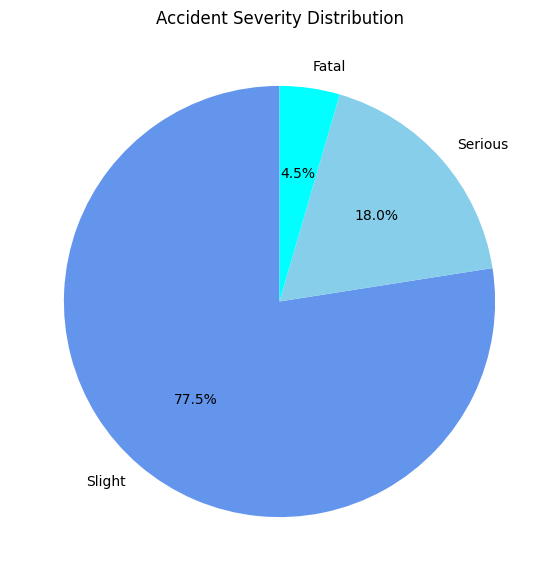

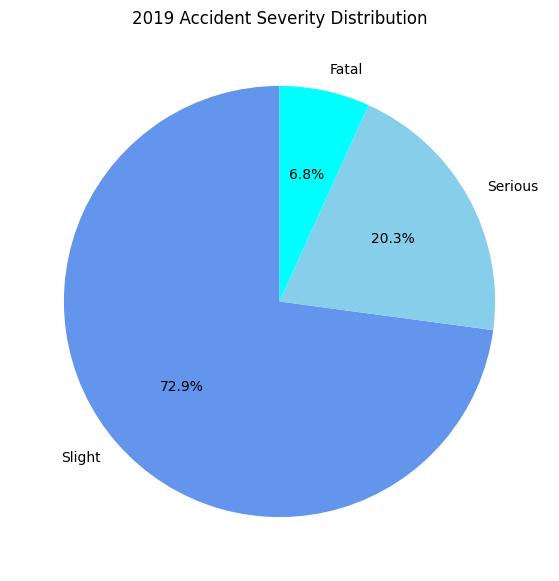

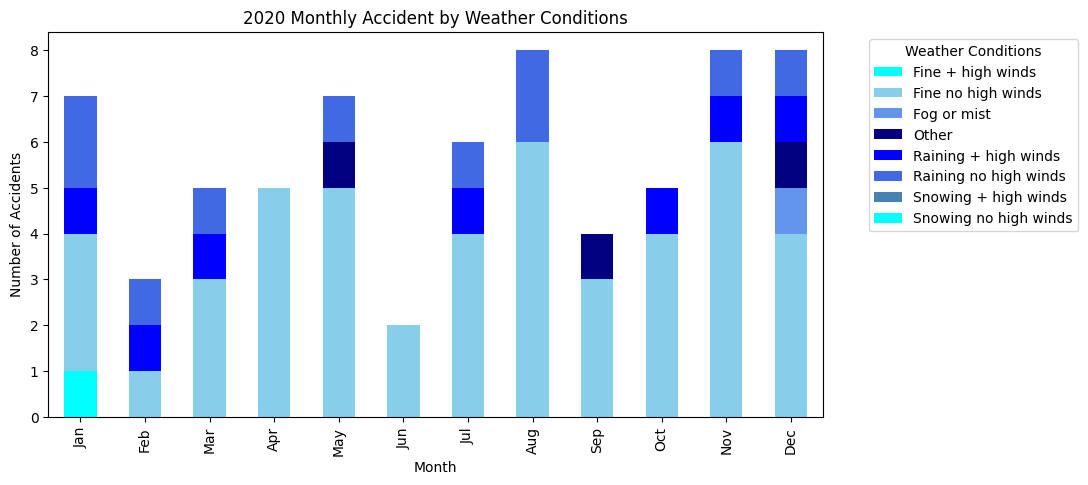

In [61]:
# Accident Severity distribution in District of Blaenau Gwent
BG_AccSev = DF_BG['Accident_Severity'].value_counts()

plt.pie(BG_AccSev,
       labels = BG_AccSev.index,
       autopct = '%1.1f%%',
       startangle = 90,
       colors = ['cornflowerblue', 'skyblue', 'cyan'])
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

# Accident Severity Distribution Year 2019
BG2019 = DF_BG[DF_BG['Year'] == 2019]
B_2019 = BG2019['Accident_Severity'].value_counts()

plt.pie(B_2019,
       labels = B_2019.index,
       autopct = '%1.1f%%',
       startangle = 90,
       colors = ['cornflowerblue', 'skyblue', 'cyan'])
plt.gcf().set_size_inches(10,7)
plt.title('2019 Accident Severity Distribution')
plt.show()


# Monthly Accident Distribution due to Weather Condition Year 2020
BG2020 = DF_BG[DF_BG['Year'] == 2020]
BG_Accidents_by_month_weather = BG2020.groupby(['Month', 'Weather_Conditions']).size().unstack()
BG_Accidents_by_month_weather.plot(kind='bar', stacked = True, color = ['cyan', 'skyblue', 'cornflowerblue', 'navy', 'blue', 'royalblue', 'steelblue', 'aqua'])

plt.title('2020 Monthly Accident by Weather Conditions')
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

<h4>Insight 27</h4>
<hr>
<h5>Pie Plot</h5>
<p>Slight accidents has the total of 72.9% that outnumber both serious and fatal accidents in the district of Blaenau Gwent. But in the year 2019, Fatal cases rose from 4.5% to 6.8%, and serious ones from 18% to 20.3%. This shows that while slight accidents are still common, more dangerous crashes are also happening. It may be a sign that driving habits or road risks are getting worse. </p>
<hr>
<h5>Bar Plot</h5>
<p>Across all months in year 2020, Fine no high winds has the highest number of accidents. This means most accidents happen when the weather is clear and calm. And high number of accidents occur in the month of August, November, and December. These months might have more traffic, travel, or outdoor activities. Even with good weather, busy roads can lead to more crashes.</p>
<hr>

<hr>

In [62]:
DF_SG = UK_Accidents[UK_Accidents['District Area'] == 'Sedgemoor']

<h3>SEDGEMOOR DISTRICT</h3>
<img src = 'https://i2-prod.somersetlive.co.uk/incoming/article6308646.ece/ALTERNATES/s1200b/1_Sedgemoor.jpg' \>

In [63]:
locations = list(zip(DF_SG['Latitude'], DF_SG['Longitude']))
SG_Map = folium.Map(location = [DF_SG['Latitude'].mean(), DF_SG['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(SG_Map)
SG_Map.save('Sedgemoor_heatmap.html')
SG_Map

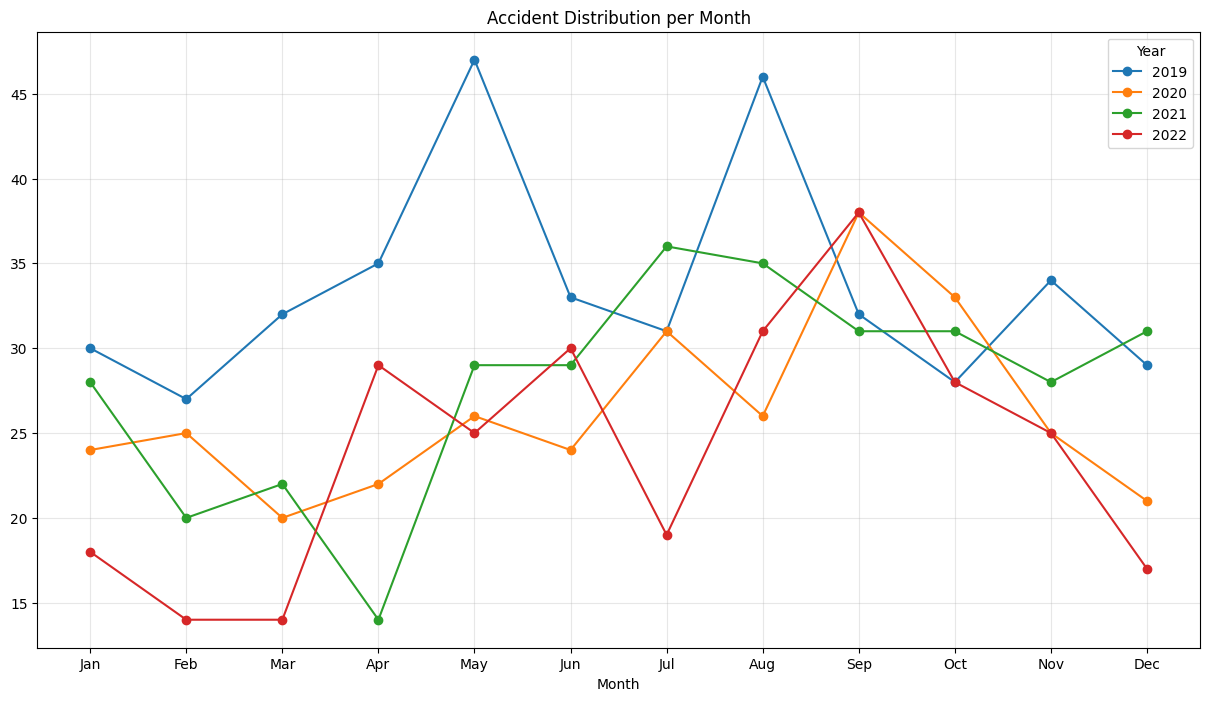

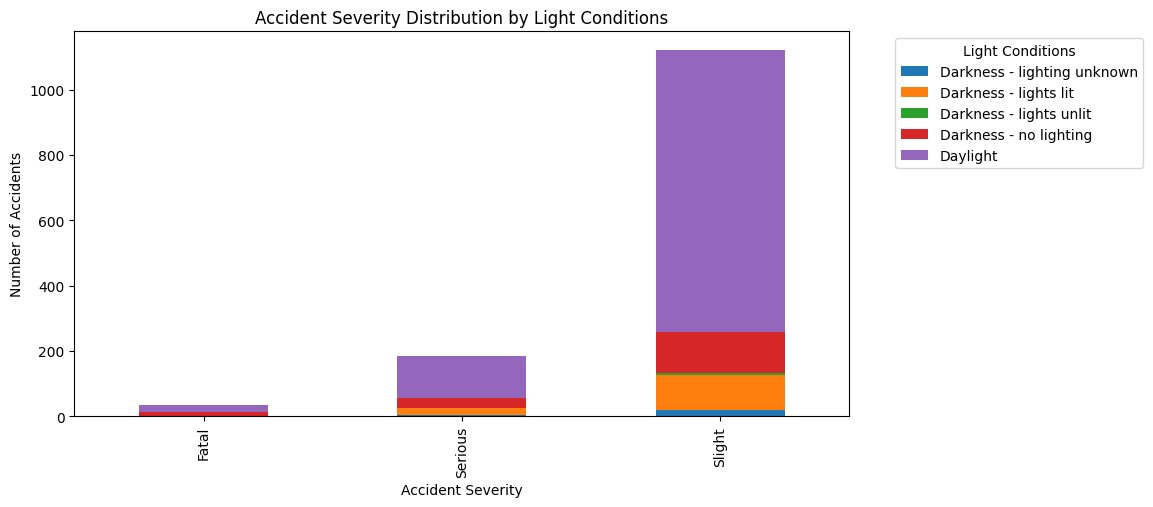

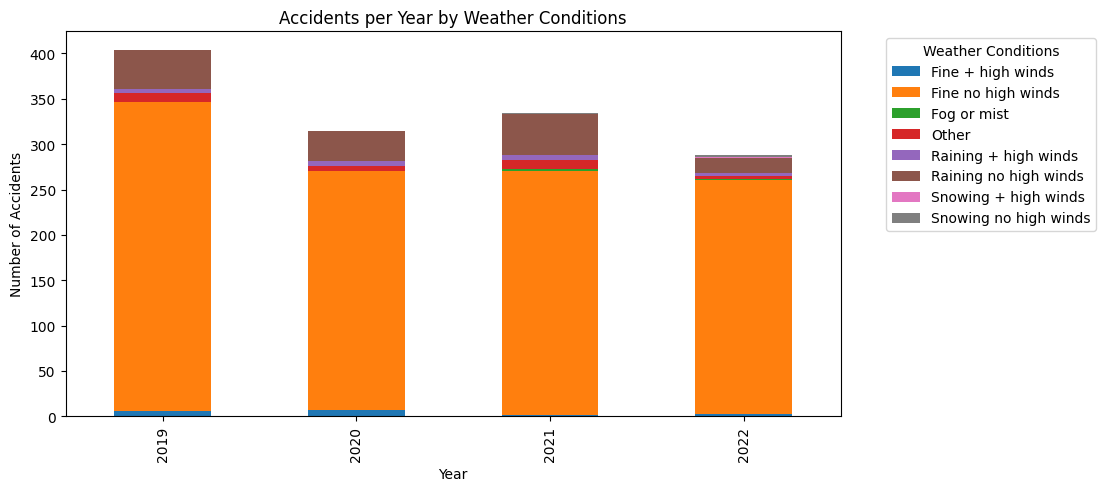

In [64]:
# Line Plot - Accident Distribution per Month
Monthly_SGdata = DF_SG.groupby(['Year', 'Month']).size().unstack(level = 0)
Monthly_SGdata.plot( marker='o', figsize = (15,8))

plt.xticks (range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Accident Distribution per Month')
plt.grid(alpha=0.3)
plt.show()

# Bar Plot - Accident Severity Distribution due to Light Conditions
SG_Accidents_by_month_weather = DF_SG.groupby(['Accident_Severity', 'Light_Conditions']).size().unstack()
SG_Accidents_by_month_weather.plot(kind='bar', stacked = True)

plt.title('Accident Severity Distribution by Light Conditions')
plt.xlabel('Accident Severity')
plt.legend(title='Light Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 3), ['Fatal','Serious','Slight'])
plt.gcf().set_size_inches(10,5)
plt.show()


# Bar Plot - Accident Distribution per Year due to Weather Conditions
SG_Accidents_by_month_weather = DF_SG.groupby(['Year', 'Weather_Conditions']).size().unstack()
SG_Accidents_by_month_weather.plot(kind='bar', stacked = True)

plt.title('Accidents per Year by Weather Conditions')
plt.xlabel('Year')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 4), ['2019','2020','2021','2022'])
plt.gcf().set_size_inches(10,5)
plt.show()

<h4>Insight 28</h4>
<hr>
<h5>Line Plot</h5>
<p>From 2019 to 2022, the number of accidents goes up and down in different months. For example, May and August had peaks in 2019, while September had the highest in 2022. This shows that accident risks can shift depending on the year and season. By studying how accident numbers change each year and month, we can spot risky times and plan better. Staying alert during peak months can help reduce both small and serious crashes.</p>
<hr>
<h5>Bar Plot</h5>
<p>Daylight is linked to the highest number of accidents, especially slight ones. This may be because more people are on the road during the day, feeling confident or distracted. Although fewer accidents happen at night, the ones that do are often more serious or fatal. Due to this, whether it’s day or night, staying alert and making smart choices is what truly keeps people safe.

Every year from 2019 to 2022, majority of accidents occur during Fine no high winds conditions. Overall number of accidents dropped slightly from 2019 to 2022. This may be due to better safety rules, fewer cars on the road, or changes in travel habits. Even with fewer accidents, the same weather pattern stayed—most crashes still happened in fine conditions.</p>
<hr>

<hr>

In [65]:
DF_SD = UK_Accidents[UK_Accidents['District Area'] == 'Sunderland']

<h3>SUNDERLAND DISTRICT</h3>
<img src = 'https://assets.publishing.service.gov.uk/media/670d27083b919067bb4830fa/s960_Riverside_Sunderland_-_Aerial_1.jpg' \>

In [66]:
locations = list(zip(DF_SD['Latitude'], DF_SD['Longitude']))
SD_Map = folium.Map(location = [DF_SD['Latitude'].mean(), DF_SD['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(SD_Map)
SD_Map.save('Sunderland_heatmap.html')
SD_Map

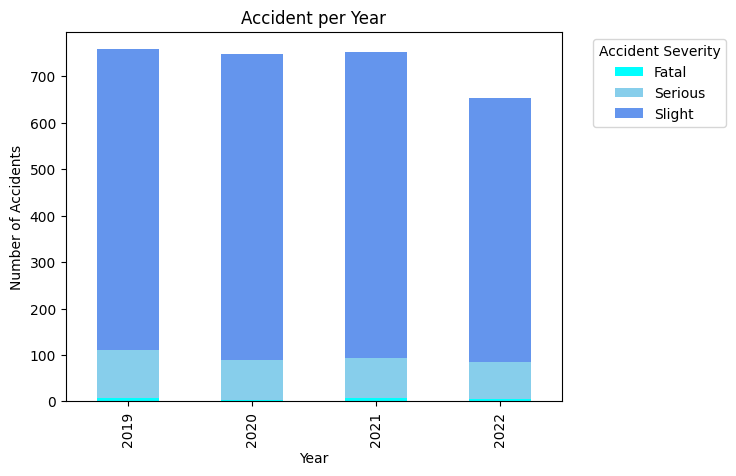

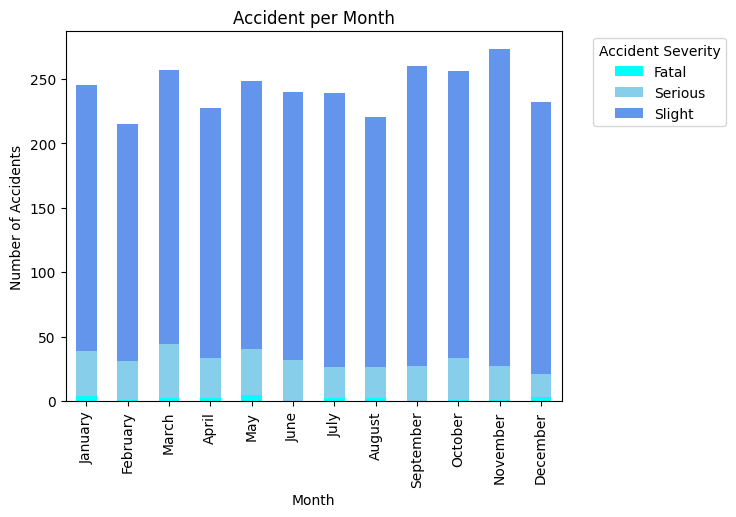

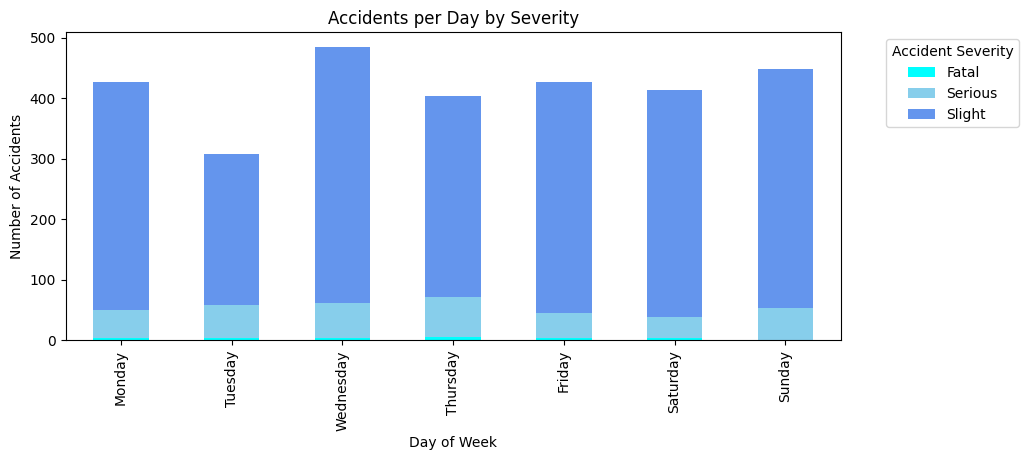

In [67]:
# Bar Plot - Accident Severity Distribution (Day of Week, Month, and Year)

Accident_Year = DF_SD.groupby(['Year', 'Accident_Severity']).size().unstack()
Accident_Year.plot(kind = 'bar', stacked=True, color = ['cyan', 'skyblue', 'cornflowerblue'])

plt.title('Accident per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left',title='Accident Severity')
plt.show()


Month = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}

Accident_Month = DF_SD.groupby(['Month', 'Accident_Severity']).size().unstack()
Accident_Month.index = Accident_Month.index.map(Month)
Accident_Month.plot(kind = 'bar', stacked=True, color = ['cyan', 'skyblue', 'cornflowerblue'])

plt.title('Accident per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left',title='Accident Severity')
plt.show()


SD_AccSev_DayOfWeek = DF_SD.groupby(['Day_Of_Week', 'Accident_Severity']).size().unstack()
SD_AccSev_DayOfWeek.plot(kind='bar', stacked=True, color = ['cyan', 'skyblue', 'cornflowerblue'])

plt.title('Accidents per Day by Severity')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left',title='Accident Severity')
plt.gcf().set_size_inches(10,4)
plt.xticks(range(0, 7), ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

<h4>Insight 29</h4>
<hr>
<h5>Bar Plot</h5>
<p>Each year from 2019 to 2022, slight accidents make up the biggest part of the total. Compared to previous years, 2022 had fewer accidents overall. Even though the numbers went down, slight accidents still stayed high.

Just like the yearly accident records, slight accidents still has the highest total of accident severity by month. The total number of accidents doesn’t change much from January to December. This means road risks are present all year, not just during certain seasons. 

Last, among all days, Wednesday shows the highest number of accidents. This could be due to midweek rush, work pressure, or tiredness building up. Each day shows that slight accidents make up the biggest part of the total. These crashes may be small, but they happen often and still cause stress and delays.
</p>
<hr>

<hr>

In [68]:
DF_VR = UK_Accidents[UK_Accidents['District Area'] == 'Vale Royal']

<h3>VALE ROYAL DISTRICT</h3>
<img src = 'https://d3e1m60ptf1oym.cloudfront.net/e78a1f68-a041-4dd1-9ae1-4c9df7f22ca7/Vale_Royal_Abbey_kd08853_wqxga.jpg' \>

In [69]:
locations = list(zip(DF_VR['Latitude'], DF_VR['Longitude']))
VR_Map = folium.Map(location = [DF_VR['Latitude'].mean(), DF_VR['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(VR_Map)
VR_Map.save('Vale_heatmap.html')
VR_Map

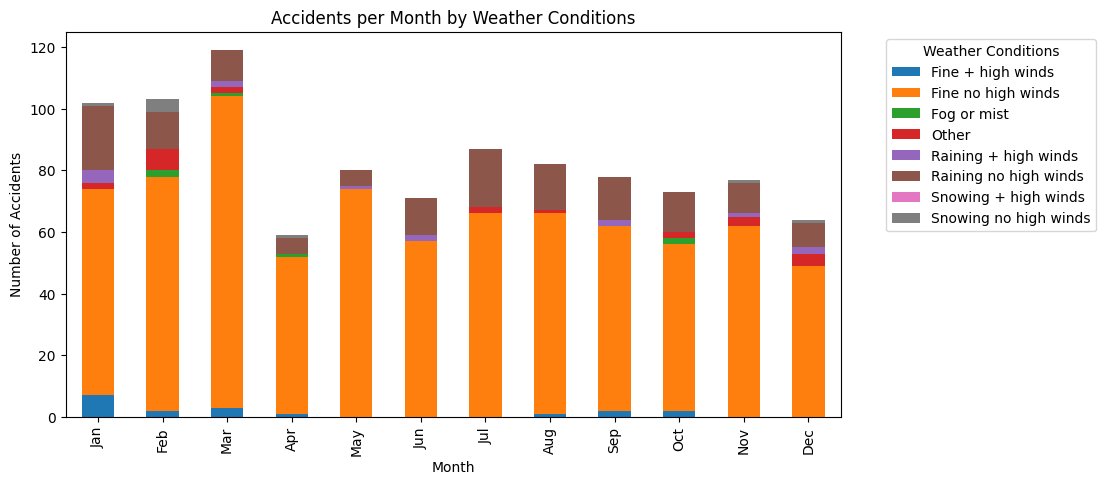

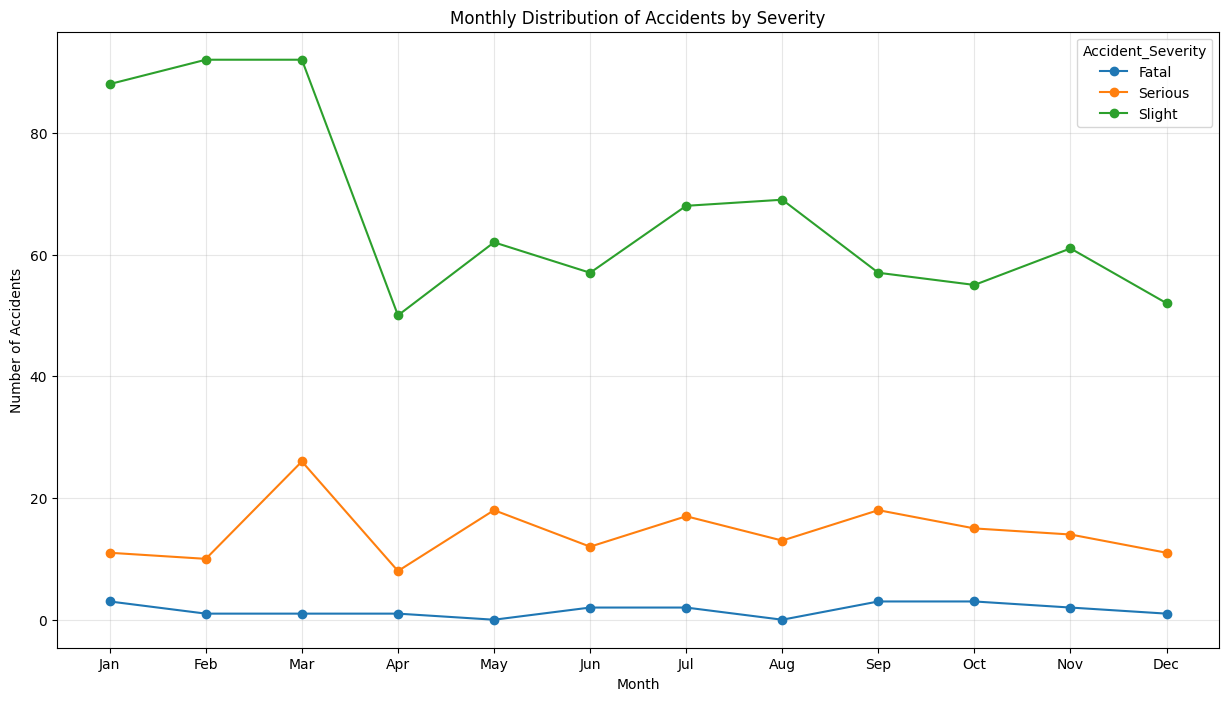

In [70]:
# Bar Plot - Monthly Accident due to Weather Conditions 
AccWeather_Monthly = DF_VR.groupby(['Month', 'Weather_Conditions']).size().unstack()
AccWeather_Monthly.plot(kind='bar',stacked=True)

plt.title('Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()



# Pie Plot - Accident Distribution per Month
Monthly_VR_data = DF_VR.groupby(['Accident_Severity', 'Month']).size()
Monthly_VR_data =  Monthly_VR_data.unstack(level=0)
Monthly_VR_data.plot( marker='o', figsize = (15,8))

plt.xticks (range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Distribution of Accidents by Severity')
plt.ylabel('Number of Accidents')
plt.grid(alpha=0.3)
plt.show()

<h4>Insight 30</h4>
<hr>
<h5>Bar Plot</h5>
<p>Surprisingly, the majority of accidents occur during "Fine no high winds" conditions. The highest number of accidents happened in February and March. These months may have more traffic or events that lead to busy roads. Even with fine weather, more cars and less focus can cause more crashes.
</p>
<hr>
<h5>Line Plot</h5>
<p>Across all months, "Slight" accidents far outnumber serious or fatal ones, with a sharp peak in February with total of around 90 cases. Thus, February and August have more serious and fatal accidents than other months. These months might have more travel, events, or risky conditions. While the numbers are lower than slight accidents, the impact is much bigger.
</p>
<hr>

<hr>

In [71]:
DF_WR = UK_Accidents[UK_Accidents['District Area'] == 'Warrington']

<h3>WARRINGTON DISTRICT</h3>
<img src = 'https://media.gettyimages.com/id/501805740/video/aquaduct-crossing-at-manchester-ship-canal-aerial-view-england-warrington-united-kingdom.jpg?s=640x640&k=20&c=Uj-XoAhoiGKSAYLgt_VVfMJltUSbzdr9aSqmAG5qM7s=' \>

In [72]:
locations = list(zip(DF_WR['Latitude'], DF_WR['Longitude']))
WR_Map = folium.Map(location = [DF_WR['Latitude'].mean(), DF_WR['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(WR_Map)
WR_Map.save('Warrington_heatmap.html')
WR_Map

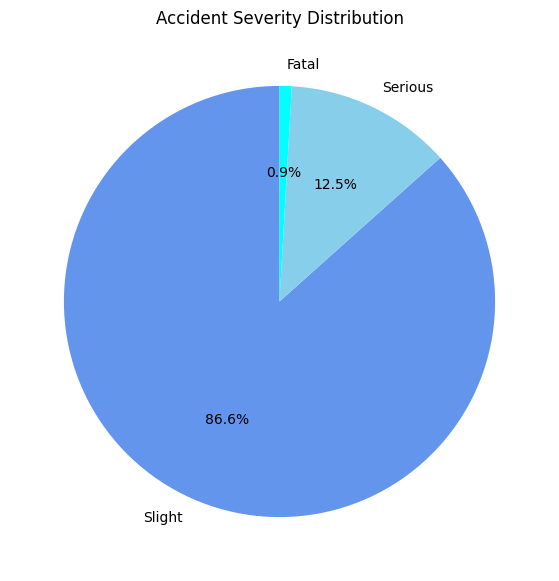

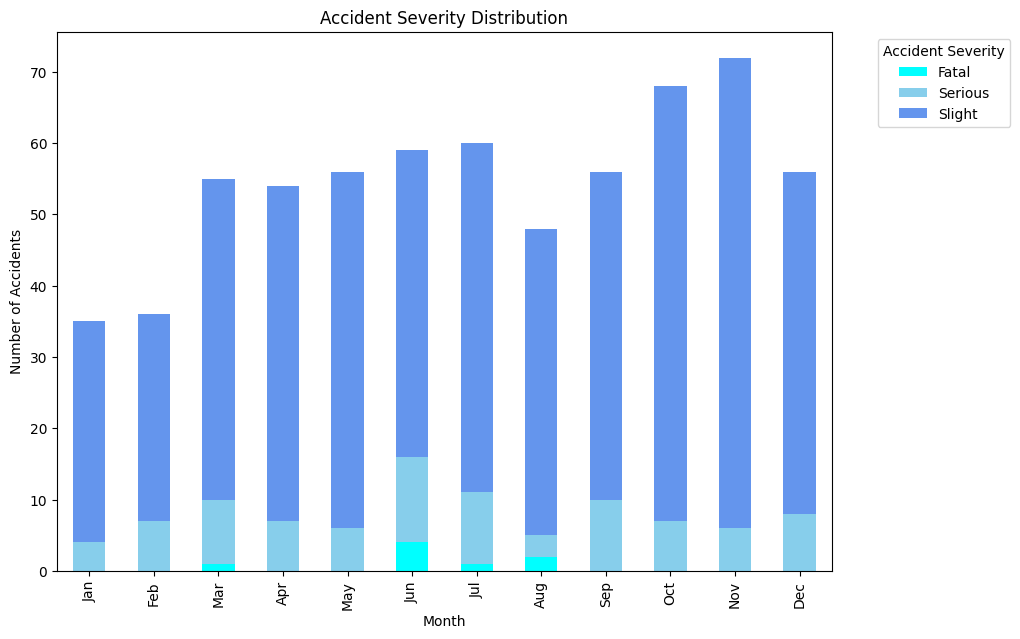

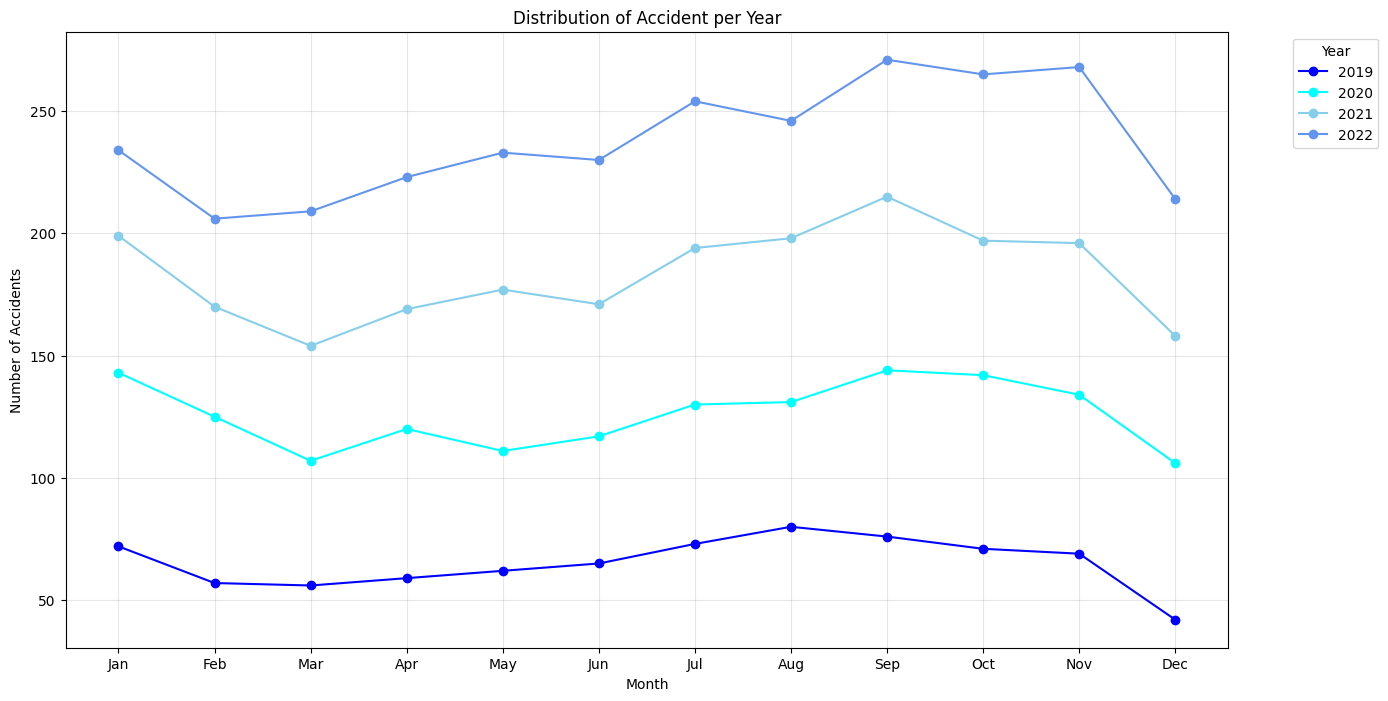

In [73]:
# Pie Plot - Accident Severity Distribution in District of Warrington
WR_AccSev = DF_WR['Accident_Severity'].value_counts()

plt.pie(WR_AccSev,
       labels = WR_AccSev.index,
       autopct = '%1.1f%%',
       startangle = 90,
       colors = ['cornflowerblue', 'skyblue', 'cyan'])
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


# Bar Plot - Accident Severity Distribution Per Month
WR2022= DF_WR[DF_WR['Year'] == 2022].groupby(['Month', 'Accident_Severity']).size().unstack()
WR2022.plot(kind='bar', stacked=True, color = ['cyan', 'skyblue', 'cornflowerblue'])

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(10,7)
plt.xticks (range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Accident Severity Distribution')
plt.show()


# Line Plot - Yearly Accident Distribution  
Monthly_WRdata = DF_WR.groupby(['Year', 'Month']).size()
Monthly_WRdata =  Monthly_WRdata.unstack(level=0)
Monthly_WRdata.plot( marker='o', figsize = (15,8), stacked=True, color = ['blue','cyan', 'skyblue', 'cornflowerblue'])

plt.xticks (range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution of Accident per Year')
plt.ylabel('Number of Accidents')
plt.grid(alpha=0.3)
plt.show()

<h4>Insight 31</h4>
<hr>
<h5>Pie & Bar Plot</h5>
<p>Almost 87% of accidents are Slight, meaning they’re not deadly but still cause damage and stress. These small crashes happen every month, showing that even tiny mistakes—like rushing or not paying attention that can lead to accidents. While Serious and fatal accidents don’t happen often, but when they do, they have a big impact.</p>
<hr>
<h5>Line Plot</h5>
<p>2022 had more accidents than others, especially peaking in September with total 271 accident. This could be because of changes in traffic, weather, or how people drive. Even though the pattern shifts, the risk is always there. In contrast, 2019 shows the lowest accident numbers throughout the year. Looking at these patterns helps us understand when and why crashes happen more often.</p>
<hr>